# Inclass Exercises 30 points

## Python Exercises

### Suppose we have two lists, x and y that give the x and y coordinates of a set of points. Create a list with the coordinates (x,y) as a tuple.

In [ ]:
x = [1, 2, 3, 4, 5]
y = [6, 7, 8, 9, 10]
coordinates = list(zip(x, y))

### Suppose we have two vectors, x and y, stored as tuples with n elements. Implement functions that compute the l1 and l2 distances between x and y. Note that n is not explicitly given.

In [ ]:
import math

# Define the vectors as tuples
x = (1, 2, 3)
y = (4, 5, 6)

# Define functions for L1 and L2 distances
def l1_distance(x, y):
    return sum(abs(a - b) for a, b in zip(x, y))

def l2_distance(x, y):
    return math.sqrt(sum((a - b) ** 2 for a, b in zip(x, y)))

# Calculate distances
l1_dist = l1_distance(x, y)
l2_dist = l2_distance(x, y)

print('l1 distantce is {}'.format(l1_dist))
print('l2 distantce is {}'.format(l2_dist))

l1 distantce is 9
l2 distantce is 5.196152422706632


### Plot the function e−xx2 over the range [0, 10] using matplotlib

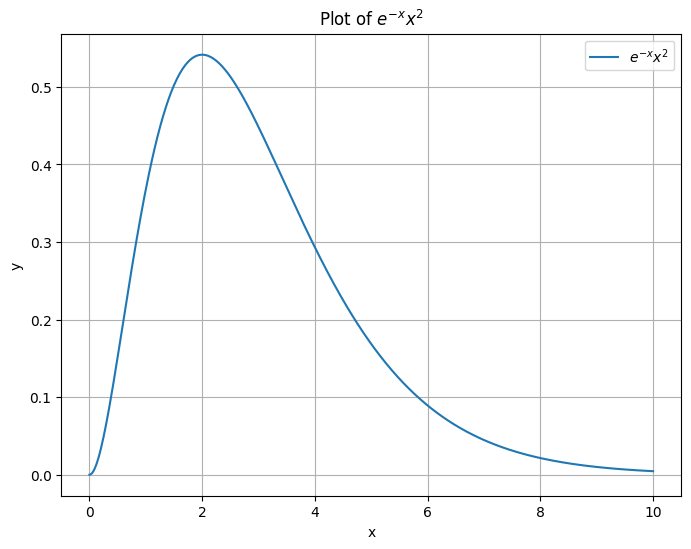

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the function
def function(x):
    return np.exp(-x) * x**2

# Generate x values from 0 to 10
x_values = np.linspace(0, 10, 400)
# Calculate y values using the defined function
y_values = function(x_values)

# Plotting
plt.figure(figsize=(8, 6))
plt.plot(x_values, y_values, label='$e^{-x}x^2$')
plt.title('Plot of $e^{-x}x^2$')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

### Find the sqrt of a number using n without using the sqrt function.

In [ ]:
def binary_search_sqrt(n, precision=1e-7):
    low, high = 0, n

    # When n is less than 1, the sqrt of n is greater than n itself
    if n < 1:
        high = 1

    while low <= high:
        mid = (low + high) / 2
        square = mid ** 2

        if abs(square - n) < precision:
            return mid
        elif square < n:
            low = mid
        else:
            high = mid

# Example: Find the square root of 10
sqrt_10 = binary_search_sqrt(10)

print(sqrt_10)

3.1622776575386524


## Knapsack Problem

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

import shutil
import sys
import os.path

if not shutil.which("pyomo"):
    !pip install -q pyomo
    assert(shutil.which("pyomo"))

if not (shutil.which("cbc") or os.path.isfile("cbc")):
    if "google.colab" in sys.modules:
        !apt-get install -y -qq coinor-cbc
    else:
        try:
            !conda install -c conda-forge coincbc
        except:
            pass

assert(shutil.which("cbc") or os.path.isfile("cbc"))

from pyomo.environ import *

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 2.3 MB/s eta 0:00:00
Selecting previously unselected package coinor-libcoinutils3v5:amd64.
(Reading database ... 121752 files and directories currently installed.)
Preparing to unpack .../0-coinor-libcoinutils3v5_2.11.4+repack1-2_amd64.deb ...
Unpacking coinor-libcoinutils3v5:amd64 (2.11.4+repack1-2) ...
Selecting previously unselected package coinor-libosi1v5:amd64.
Preparing to unpack .../1-coinor-libosi1v5_0.108.6+repack1-2_amd64.deb ...
Unpacking coinor-libosi1v5:amd64 (0.108.6+repack1-2) ...
Selecting previously unselected package coinor-libclp1.
Preparing to unpack .../2-coinor-libclp1_1.17.5+repack1-1_amd64.deb ...
Unpacking coinor-libclp1 (1.17.5+repack1-1) ...
Selecting previously unselected package coinor-libcgl1:amd64.
Preparing to unpack .../3-coinor-libcgl1_0.60.3+repack1-3_amd64.deb ...
Unpacking coinor-libcgl1:amd64 (0.60.3+repack1-3

W: knapsack capacity (in lbs)  
N: Num of goods in the warehouse  
w<sub>i</sub>: Total weight of the i<sup>th</sup> good  
v<sub>i</sub>: The value of the i<sup>th</sup> good  
x<sub>i</sub>: The fraction of the i<sup>th</sup> good carried away by the thief  

### 1. Model the above problem as a LP.
Objective function (maximize):
$$
\sum_{i} v_i x_i,
$$  
Restrictions 1: x<sub>i</sub> ≤ 1 for i = 1,2,...,N  
Restrictions 2:
$$
\sum_{i} w_i x_i ≤ W
$$  

### 2.Consider a specific instance of the problem with N = 3 and W = 4Let v = (2, 3, 4) and w = (5, 20, 3) Use Pyomo to obtain the optimal solution

In [ ]:
from pyomo.environ import ConcreteModel, Var, Objective, Constraint, SolverFactory, NonNegativeReals, maximize

# Problem data
N = 3  # Number of items
W = 4  # Knapsack capacity in lbs
v = [2, 3, 4]  # Values of the items
w = [5, 20, 3]  # Weights of the items

# Model
model = ConcreteModel()

# Decision Variables
model.x = Var(range(N), within=NonNegativeReals, bounds=(0, 1))

# Objective Function: Maximize total value of the items taken
model.value = Objective(expr=sum(v[i] * model.x[i] for i in range(N)), sense=maximize)

# Constraint: Total weight must not exceed knapsack capacity
model.weight_constraint = Constraint(expr=sum(w[i] * model.x[i] for i in range(N)) <= W)

# Solve the model
solver = SolverFactory('cbc')
result = solver.solve(model, tee=True)

# Display the solution
print("Solution:")
for i in range(N):
    print(f"x_{i+1} = {model.x[i].value}")
print(f"Total Value = {model.value.expr()}")

Welcome to the CBC MILP Solver 
Version: 2.10.7 
Build Date: Feb 14 2022 

command line - /usr/bin/cbc -printingOptions all -import /tmp/tmpqqa691_k.pyomo.lp -stat=1 -solve -solu /tmp/tmpqqa691_k.pyomo.soln (default strategy 1)
Option for printingOptions changed from normal to all
 CoinLpIO::readLp(): Maximization problem reformulated as minimization
Coin0009I Switching back to maximization to get correct duals etc
Presolve 1 (0) rows, 3 (0) columns and 3 (0) elements
Statistics for presolved model


Problem has 1 rows, 3 columns (3 with objective) and 3 elements
There are 3 singletons with objective 
Column breakdown:
0 of type 0.0->inf, 0 of type 0.0->up, 0 of type lo->inf, 
0 of type lo->up, 0 of type free, 0 of type fixed, 
0 of type -inf->0.0, 0 of type -inf->up, 3 of type 0.0->1.0 
Row breakdown:
0 of type E 0.0, 0 of type E 1.0, 0 of type E -1.0, 
0 of type E other, 0 of type G 0.0, 0 of type G 1.0, 
0 of type G other, 0 of type L 0.0, 0 of type L 1.0, 
1 of type L other, 0 of t

### 3. Which constrains are tight/binding?

There are 2 constrains that are binding:  
1.
$$
\sum_{i} w_i x_i ≤ W
$$  
2. x<sub>3</sub> ≤ 1

### 4. Suppose a crime syndicate wants to buy out the thief. They offer to pay the thief a price y<sub>1</sub> for the gold, a price y<sub>2</sub> for the diamonds, a price y<sub>3</sub> for the silver, and a price y<sub>4</sub> per lb for the knapsack. The syndicate wants to minimize the price it pays for the goods. What is the solution for this problem. What is the connection to the previous problem?

c =
$$
\begin{bmatrix}
v1 & v2 & v3
\end{bmatrix}
$$  

X =
$$
\begin{bmatrix}
x1 \\
x2 \\
x3
\end{bmatrix}
$$  

A =
$$
\begin{bmatrix}
w1 & w2 & w3 \\
1 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}
$$  

b =
$$
\begin{bmatrix}
W \\
1 \\
1 \\
1
\end{bmatrix}
$$

Y =
$$
\begin{bmatrix}
y4 & y1 & y2 & y3
\end{bmatrix}
$$


For the primal problem, it's  
**Maximize Z = c'*X**
**Subject to A*X ≤ b**  
For the dual problem, it's  
**Minimize b'*Y**  
**Subject to Y*A ≥ c'**  

Given the primal problem:

Maximize Z = v<sub>1</sub>*x<sub>1</sub> + v<sub>2</sub>*x<sub>2</sub> + v<sub>3</sub>*x<sub>3</sub>  
Subject to:  
w<sub>1</sub>*x<sub>1</sub> + w<sub>2</sub>*x<sub>2</sub> + w<sub>3</sub>*x<sub>3</sub> ≤ W  
x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub> ≤ 1   
x<sub>1</sub>, x<sub>2</sub>, x<sub>3</sub> ≥ 0  

The corresponding dual problem will be:  
Minimize Y = W*y<sub>4</sub> + y<sub>1</sub> + y<sub>2</sub> + y<sub>3</sub>  
Subject to:  
y<sub>4</sub>*w<sub>1</sub> + y<sub>1</sub> ≥ v<sub>1</sub>  
y<sub>4</sub>*w<sub>2</sub> + y<sub>2</sub> ≥ v<sub>2</sub>  
y<sub>4</sub>*w<sub>2</sub> + y<sub>2</sub> ≥ v<sub>2</sub>  
which means that the money the crime syndicate would like to pay for gold/diamond/silver part in the knapsack (y<sub>4</sub>*w<sub>i</sub>) and the gold/diamond/silver (y<sub>i</sub>) is greater than its original value (v<sub>i</sub>).

**Connection to the Previous Problem**  
The connection between the dual problem and the primal problem is through the prices y1, y2, y3, and y4. Here's what they represent: y1, y2, y3 are the prices per unit the crime syndicate is willing to pay for the fraction of the goods that the thief has chosen in the primal problem. y4 is the price per pound the crime syndicate is willing to pay for the capacity of the knapsack itself.  
According to the duality theory in linear programming:  
The dual variables yi can be interpreted as the shadow prices of the respective constraints in the primal problem. The shadow price of a constraint represents how much the objective function value would increase if the constraint's right-hand side is increased by one unit. In this case, how much more the syndicate would be willing to pay if they could get one more pound of capacity in the knapsack, or one more unit of each good.
If a primal constraint is tight (as in the weight constraint for our problem), its corresponding dual variable is positive. This means that the syndicate will indeed assign a positive price to the knapsack's capacity.
The optimal values of the primal and dual problems are equal in value when both are solvable.  
To solve the dual problem, we would construct a linear programming model similar to the primal one but with the dual constraints and objective function. The solution would give us the minimum price the syndicate should pay to the thief for the goods and the knapsack while outbidding any other potential use the thief has for them.  

### 5. Discussion Points

**(a) The above instance had a unique optimum solution. Will this be true for all instances of the knapsack problem?.**  
No, the knapsack problem does not always have a unique optimal solution. For example, when multiple items have the same unit value, there may be multiple optimal solutions.  
**(b) What happens if we remove the constraint x ≥ 0 in the first part?**  
If we remove the x≥0 constraint, then the decision variable may have a negative value, which is meaningless in a real-world case because you cannot have a negative number of items.  
**(c) Can you list some more feasible solutions to this LP?**  
For the above LP problem, in addition to the optimal solution, solutions such as x<sub>1</sub>= 0.1, x<sub>2</sub>=0, x<sub>3</sub>=1 is also a feasible solution, as long as the total weight does not exceed the knapsack limit.  
**(d) Can you think of more realistic applications for the knapsack problem?**  
The knapsack problem has many practical applications, such as resource allocation, capital allocation, loading problems, etc.  
**(e) Why might it be practically important that only one good is chosen fractionally?**  
In practice, due to resource constraints, sometimes it may be necessary to choose between different items and select only a few items, in which case it is important to be able to select a part of an item in order to make more efficient use of resources, especially when resources are limited and items are divisible.  

# Sensitivity Analysis 25 pts

## 1) Which of the plants is operating at a full capacity


In [ ]:
from pyomo.environ import *

# Step 0: Create an instance of the model
model = ConcreteModel()
model.dual = Suffix(direction=Suffix.IMPORT)

# Data for the model
Supply = {'A': 1000, 'B': 500, 'C': 300}
Demand = {'Louisville': 800, 'Cincinnati': 800, 'Columbus': 350}
T = {
    ('Louisville', 'A'): 0.4, ('Cincinnati', 'A'): 0.2, ('Columbus', 'A'): 0.6,
    ('Louisville', 'B'): 0.2, ('Cincinnati', 'B'): 0.4, ('Columbus', 'B'): 0.3,
    ('Louisville', 'C'): 0.3, ('Cincinnati', 'C'): 0.2, ('Columbus', 'C'): 0.1
}

# Step 1: Define index sets
CUS = list(Demand.keys())
SRC = list(Supply.keys())

# Step 2: Define the decision variables
model.x = Var(CUS, SRC, domain=NonNegativeReals)

# Step 3: Define Objective
@model.Objective(sense=minimize)
def cost(m):
    return sum(T[c,s]*m.x[c,s] for c in CUS for s in SRC)

# Step 4: Supply Constraints
@model.Constraint(SRC)
def supply_constraints(m, s):
    return sum(m.x[c,s] for c in CUS) == Supply[s]

# Step 5: Demand Constraints (not strict as per the user's problem statement)
@model.Constraint(CUS)
def demand_constraints(m, c):
    return sum(m.x[c,s] for s in SRC) <= Demand[c]

# Step 6: Solve the model
results = SolverFactory('cbc').solve(model)
results.write()

# Display the results
for c in CUS:
    for s in SRC:
        print(f"Shipment from source {s} to customer {c}: {model.x[c,s].value} units")

# Total cost
print("Total Cost:", model.cost())


# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 370.0
  Upper bound: 370.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 9
  Number of nonzeros: 9
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created sub

#### Calculate profit with the minimum cost

Demand: 800 + 800 + 350 = 1950 lbs per day

Production Capacity: 1000 + 500 + 300 = 1800 lbs per day

All Plants are operating at full capacity, but can yet to meet demand.

production cost = 1000 * 0.5 + 500 * 0.6 + 300 * 0.9 = \$1070 per day

transportation cost = 800 * 0.2 + 200 * 0.4 + 500 * 0.2 + 300 * 0.1 = \$370 per day

revenue = 1800 * 1.4 = \$2520 per day

profit = 2520 - 1070 - 370 = \$1080 per day

## 2) Which plant should be chosen to increase capacity

If the cost of increasing capacity at all plants is the same, we should increase capacity at plant B. We want to add the production cost and the lowest transportation cost for each plant.

Produced by Plant A --> Louisville: 0.5 + 0.4 = \$0.9 per lb

Produced by Plant B --> Louisville: 0.6 + 0.2 = \$0.8 per lb

Produced by Plant C --> Columbus: 0.9 + 0.1 = $1 per lb

Total cost for producing at Plant B and transport to Louisville is the lowest. Therefore, we want to select this plant to increase capacity.

### 3) If plant B was closed for temporary maintainance work, what would be the impact on profits.

In order to minimize transportation cost and without producing capacity at plant B, plant A still produces 1000 lbs with 800 lbs going to Cincinnati and 200 lbs going to Louisville. Meanwhile plant C produces 300 lbs and all go to Columbus.

In this case, the total cost (production + transportation) is \$1040. And without plant B, the revenue is \$1820. Therefore, the profit is decreased from \$1080 to \$780 per day.

In [ ]:
from pyomo.environ import *

# Step 0: Create an instance of the model
model2 = ConcreteModel()
model2.dual = Suffix(direction=Suffix.IMPORT)

# Data for the model
Supply2 = {'A': 1000, 'C': 300}
Demand = {'Louisville': 800, 'Cincinnati': 800, 'Columbus': 350}
T2 = {
    ('Louisville', 'A'): 0.4, ('Cincinnati', 'A'): 0.2, ('Columbus', 'A'): 0.6,
    ('Louisville', 'C'): 0.3, ('Cincinnati', 'C'): 0.2, ('Columbus', 'C'): 0.1
}

# Step 1: Define index sets
CUS = list(Demand.keys())
SRC2 = list(Supply2.keys())

# Step 2: Define the decision variables
model2.x = Var(CUS, SRC2, domain=NonNegativeReals)

# Step 3: Define Objective
@model2.Objective(sense=minimize)
def cost2(m2):
    return sum(T2[c,s]*m2.x[c,s] for c in CUS for s in SRC2)

# Step 4: Supply Constraints
@model2.Constraint(SRC2)
def supply_constraints2(m2, s):
    return sum(m2.x[c,s] for c in CUS) == Supply2[s]

# Step 5: Demand Constraints (not strict as per the user's problem statement)
@model2.Constraint(CUS)
def demand_constraints(m2, c):
    return sum(m2.x[c,s] for s in SRC2) <= Demand[c]

# Step 6: Solve the model
results2 = SolverFactory('cbc').solve(model2)
results2.write()

# Display the results
for c in CUS:
    for s in SRC2:
        print(f"Shipment from source {s} to customer {c}: {model2.x[c,s].value} units")

# Total cost
print("Total Cost:", model2.cost2())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 270.0
  Upper bound: 270.0
  Number of objectives: 1
  Number of constraints: 5
  Number of variables: 6
  Number of nonzeros: 6
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created sub

### 4) A promotion of $15 per day but demand increase 100 lbs per day at Cincinnati. Is the promotion profitable?

As demand at Cincinnati increases by 100, plant A transports 100 more to Cincinnati, leaving Louisville 100 less from plant A due to the lower cost in transportation.

production cost = 1000 * 0.5 + 500 * 0.6 + 300 * 0.9 = \$1070 per day

transportation cost = 900 * 0.2 + 100 * 0.4 + 500 * 0.2 + 300 * 0.1 = \$350 per day

promotion = $15/day

New total cost (production + transportation + promotion):
 = $1435 per day

Revenue did not change: $2520 per day

New Profit: 2520-1435 = $1085 per day

The new profit is higher than the original profit. So we can say that this is a profitable promotion.

### 5) A Cheaper mode of transportation from Plant A to Cincinnati can reduce transportation cost by $0.1 but with a fixed \$50 cost. Is it worth investing?


In [ ]:
from pyomo.environ import *

# Step 0: Create an instance of the model
model3 = ConcreteModel()
model3.dual = Suffix(direction=Suffix.IMPORT)

# Data for the model
Supply = {'A': 1000, 'B': 500, 'C': 300}
Demand = {'Louisville': 800, 'Cincinnati': 800, 'Columbus': 350}
T3 = {
    ('Louisville', 'A'): 0.4, ('Cincinnati', 'A'): 0.1, ('Columbus', 'A'): 0.6,
    ('Louisville', 'B'): 0.2, ('Cincinnati', 'B'): 0.4, ('Columbus', 'B'): 0.3,
    ('Louisville', 'C'): 0.3, ('Cincinnati', 'C'): 0.2, ('Columbus', 'C'): 0.1
}

# Step 1: Define index sets
CUS = list(Demand.keys())
SRC = list(Supply.keys())

# Step 2: Define the decision variables
model3.x = Var(CUS, SRC, domain=NonNegativeReals)

# Step 3: Define Objective
@model3.Objective(sense=minimize)
def cost3(m3):
    return sum(T3[c,s]*m3.x[c,s] for c in CUS for s in SRC)

# Step 4: Supply Constraints
@model3.Constraint(SRC)
def supply_constraints(m3, s):
    return sum(m3.x[c,s] for c in CUS) == Supply[s]

# Step 5: Demand Constraints (not strict as per the user's problem statement)
@model3.Constraint(CUS)
def demand_constraints(m3, c):
    return sum(m3.x[c,s] for s in SRC) <= Demand[c]

# Step 6: Solve the model
results3 = SolverFactory('cbc').solve(model3)
results.write()

# Display the results
for c in CUS:
    for s in SRC:
        print(f"Shipment from source {s} to customer {c}: {model3.x[c,s].value} units")

# Total cost
print("Total Cost:", model3.cost3())

# ==========================================================
# = Solver Results                                         =
# ==========================================================
# ----------------------------------------------------------
#   Problem Information
# ----------------------------------------------------------
Problem: 
- Name: unknown
  Lower bound: 370.0
  Upper bound: 370.0
  Number of objectives: 1
  Number of constraints: 6
  Number of variables: 9
  Number of nonzeros: 9
  Sense: minimize
# ----------------------------------------------------------
#   Solver Information
# ----------------------------------------------------------
Solver: 
- Status: ok
  User time: -1.0
  System time: 0.0
  Wallclock time: 0.0
  Termination condition: optimal
  Termination message: Model was solved to optimality (subject to tolerances), and an optimal solution is available.
  Statistics: 
    Branch and bound: 
      Number of bounded subproblems: None
      Number of created sub


production cost = 1000 * 0.5 + 500 * 0.6 + 300 * 0.9 = \$1070 per day

transportation cost = 800 * 0.1 + 200 * 0.4 + 500 * 0.2 + 300 * 0.1 = \$290 per day

fix cost = $500

New total cost (production + transportation + fix cost) = $1410 per day

Revenue did not change: $2520 per day

New Profit: 2520-1410 = $1110 per day

The new profit is higher than the original profit. So this cheaper mode of transportation is worth investing.  

# Task Scheduling 15 pts

## 1) formulate this problem as an LP. Clearly indicate your decision variables, your objective function, and your constraints

* Decision Variables:
Let $x_{ij}$ be the fraction of part \( i \) produced using setup \( j \). There are 4 setups (A, B, C, D) and 4 parts (1, 2, 3, 4), so we have 16 decision variables in total.

* Objective Function:
Minimize the total cost of production, which is calculated as the sum of the production time for each part-setup combination multiplied by the cost rate of that setup. The costs rates are \$300/hr for setup A, \$250/hr for setup B \$350/hr for setup C, and \$200/hr for setup D.  
The objective function is given by:
$$
\text{Minimize } Z = \sum_{i=1}^{4} \sum_{j \in \{A, B, C, D\}} (x_{ij} \cdot \text{hours}_{ij} \cdot \text{rate}_j)
$$

* Constraints:

    - Setup time limitations:
$$
\begin{align*}
30x_{1A} + 20x_{2A} + 40x_{4A} & \leq 60 \\
30x_{1B} + 30x_{2B} + 30x_{3B} & \leq 60 \\
25x_{1C} + 25x_{2C} + 25x_{3C} + 25x_{4C} & \leq 50 \\
40x_{3D} + 40x_{4D} & \leq 40 \\
\end{align*}
$$

    - Non-negativity and proportion upper bound:
$$
0 \leq x_{ij} \leq 1 \quad \forall i \in \{1, 2, 3, 4\}, \quad \forall j \in \{A, B, C, D\}
$$


### 2) Solve this in Pyomo

In [ ]:
from pyomo.environ import *

# Create a model instance
model = ConcreteModel()

# Setups and parts
setups = ['A', 'B', 'C', 'D']
parts = ['1', '2', '3', '4']

# Cost rates and total hours available for each setup
setup_costs = {'A': 300, 'B': 250, 'C': 350, 'D': 200}
total_hours_available = {'A': 60, 'B': 60, 'C': 50, 'D': 40}

# Hours required to produce one unit of each part by each setup
hours_per_part = {('A', '1'): 30, ('A', '2'): 20, ('A', '4'): 40,
          ('B', '1'): 30, ('B', '2'): 30, ('B', '3'): 30,
          ('C', '1'): 25, ('C', '2'): 25, ('C', '3'): 25, ('C', '4'): 25,
          ('D', '3'): 40, ('D', '4'): 40}

# Decision Variables: fraction of each part produced by each setup
model.x = Var(parts, setups, domain=NonNegativeReals, bounds=(0, 1))

# Objective: Minimize the total cost
model.cost = Objective(
    expr = sum(model.x[p, s] * hours_per_part[s, p] * setup_costs[s] for p in parts for s in setups if (s, p) in hours_per_part),
    sense = minimize)

# Constraints

# Each part must be completed
model.part_completion = ConstraintList()
for p in parts:
    model.part_completion.add(expr = sum(model.x[p, s] for s in setups if (s, p) in hours_per_part) == 1)

# Total time used by each setup must not exceed availability
model.time_utilization = ConstraintList()
for s in setups:
    model.time_utilization.add(
        expr = sum(model.x[p, s] * hours_per_part[s, p] for p in parts if (s, p) in hours_per_part) <= total_hours_available[s])

# Solve the model
solver = SolverFactory('cbc')
solver.solve(model)

# Display results
print("Total Cost: ", model.cost())

for p in parts:
    for s in setups:
        if (s, p) in hours_per_part and model.x[p, s].value is not None:
            print(f"Fraction of Part {p} produced by Setup {s}: {model.x[p, s].value}")


Total Cost:  29000.0
Fraction of Part 1 produced by Setup A: 0.0
Fraction of Part 1 produced by Setup B: 1.0
Fraction of Part 1 produced by Setup C: 0.0
Fraction of Part 2 produced by Setup A: 1.0
Fraction of Part 2 produced by Setup B: 0.0
Fraction of Part 2 produced by Setup C: 0.0
Fraction of Part 3 produced by Setup B: 1.0
Fraction of Part 3 produced by Setup C: 0.0
Fraction of Part 3 produced by Setup D: 0.0
Fraction of Part 4 produced by Setup A: 0.0
Fraction of Part 4 produced by Setup C: 0.0
Fraction of Part 4 produced by Setup D: 1.0


# Resource Allocation Linear Program 15 pts

### 1. Formulate this as a linear program

### Decision Variables:
- $x_{ij}$: Amount of water allocated from reservoir \( i \) to farmer \( j \).
- z: Minimum amount of water received by any farmer after accounting for evaporation.

### Objective Function:
Maximize the minimum amount of water received by any farmer.
$$ \max z $$

### Constraints:
- Each farmer receives at least \( z \) amount of water after accounting for evaporation:
$$ \sum_{i} (1 - f_{ij}) x_{ij} \geq z, \quad \forall j $$
- Water allocated from each reservoir must not exceed its capacity:
$$ \sum_{j} x_{ij} \leq u_i, \quad \forall i $$
- Non-negativity constraint for the water allocation:
$$ x_{ij} \geq 0, \quad \forall i, \forall j $$


### 2. For an arbitrary optimal solution, what is the maximum number of meters that will be installed?

In an arbitrary optimal solution, if each reservoir are connected to each farmer with a non-zero allocation, the maximum number of meters that will be installed is m×n. This scenario represents the upper limit of meter installation and occurs when every reservoir-to-farmer pathway is utilized, regardless of the practical necessity or efficiency. This theoretical maximum aligns with the possibility of maximizing the distribution reach, albeit not necessarily the distribution efficiency.

### 3. Prove that an optimal solution will always exist

The linear programming function follows these 2 characteristics
- The solution space is feasible because even an allocation of zero water $X_{ij} $ satisfies all constraints, although the objective is to maximize the minimum received amount z, to be more than zero.

- The decision variables $X_{ij}$ are bounded between zero and the respective reservoir capacities $u_i $The objective z, constrained by these capacities and evaporation rates, is similarly bounded.

The feasible region, by linear capacity and delivery constraints, forms a convex polyhedron in the multidimensional space of $x_{ij}$. Given that the objective function z is a linear combination of the bounded variables $x_{ij}$, it is both continuous and bounded over this compact set. Linear programming theory tells us that in a well-defined area, a continuous and logically constrained function will always reach its highest possible value. We can find the best way to maximize the smallest amount of water any farmer receives, making sure that each farmer gets as much water as possible given the limits of reservoir capacity and evaporation losses.



### 4. Suppose farmer 2 cannot be served by reservoir 3 because the farmer is at a higher altitude than the the reservoir. How can you take this into account in your model without increasing the number of constraints or variables?



In the linear programming formulation, the decision variable $x_{ij}$ represents the amount of water transferred from reservoir i to farmer j. The simplest approach to block water transfer from reservoir 3 to farmer 2 is to set the corresponding loss fraction $f_{32}$ to a value that effectively prevents any allocation. This can be achieved by setting $f_{32}$ = 1, which means that any water sent from reservoir 3 to farmer 2 would completely evaporate. By integrating the altitude restriction into the existing model with minimal disruption and no expansion of the model's complexity in terms of its variables and constraints. This way keeps the model streamlined while respecting practical limitations in the water distribution network.

# Capacity Management 15 pts

### 1. Formulate a linear programming problem that can be used to maximize the daily profit of the company.

### Decision Variables:
- $x_1$: Number of products of the first type produced per day.
- $x_2$: Number of products of the second type produced per day.

### Objective Function:
Maximize the daily profit of the company:
$$ \max Z = 7.8x_1 + 7.1x_2 $$

### Constraints:
Assembly labor constraint
$$ \frac{1}{4}x_1 + \frac{1}{3}x_2 \leq 90 $$

Testing time constraint
$$ \frac{1}{8}x_1 + \frac{1}{3}x_2 \leq 80 $$

Non-negativity constraints:
$$ x_1, x_2 \geq 0 $$


In [ ]:
from pyomo.environ import *

# Create a model instance named model4
model4 = ConcreteModel(name='Model4')

# Decision Variables
model4.x1 = Var(domain=NonNegativeReals)
model4.x2 = Var(domain=NonNegativeReals)

# Objective Function: Maximize daily profit
model4.profit = Objective(
    expr = 7.8*model4.x1 + 7.1*model4.x2,
    sense = maximize)

# Constraints
model4.assembly_labor = Constraint(expr = 1/4*model4.x1 + 1/3*model4.x2 <= 90)
model4.testing_time = Constraint(expr = 1/8*model4.x1 + 1/3*model4.x2 <= 80)

# Solve
solver = SolverFactory('cbc')
solver.solve(model4)

# Display results
print(f"Number of Product 1: {model4.x1.value}")
print(f"Number of Product 2: {model4.x2.value}")
print(f"Maximum Profit: {model4.profit()}")


Number of Product 1: 360.0
Number of Product 2: 0.0
Maximum Profit: 2808.0


### 2. Suppose that up to 50 hours of overtime assembly labor can be scheduled, at a cost of $7 per hour. Modify the linear program from part 1 to incorporate this change. Clearly specify the entire new LP, not just any changes.


### Decision Variables:
- $x_1$: Number of products of the first type produced per day.
- $x_2$: Number of products of the second type produced per day.
- $x_3$: Number of overtime assembly hours used.

### Objective Function:
Maximize the daily profit, considering the cost of overtime labor:
$$ \max Z = 7.8x_1 + 7.1x_2 - 7x_3 $$

### Constraints:
Assembly labor + overtime constraint:
$$ \frac{1}{4}x_1 + \frac{1}{3}x_2 \leq 90 + x_3 $$

Overtime assembly labor constraint:
$$ x_3 \leq 50 $$

Testing time constraint:
$$ \frac{1}{8}x_1 + \frac{1}{3}x_2 \leq 80 $$

Non-negativity constraints:
$$ x_1, x_2, x_3 \geq 0 $$


In [ ]:
from pyomo.environ import *

# Create a new model instance named model5
model5 = ConcreteModel(name='Model5')

# Decision Variables
model5.x1 = Var(domain=NonNegativeReals)
model5.x2 = Var(domain=NonNegativeReals)
model5.x3 = Var(domain=NonNegativeReals)

# Objective Function: Maximize daily profit, considering the cost of overtime labor
model5.profit = Objective(
    expr = 7.8*model5.x1 + 7.1*model5.x2 - 7*model5.x3,
    sense = maximize)

# Constraints
model5.assembly_labor_overtime = Constraint(expr = 1/4*model5.x1 + 1/3*model5.x2 - model5.x3 <= 90)
model5.overtime_assembly_labor = Constraint(expr = model5.x3 <= 50)
model5.testing_time = Constraint(expr = 1/8*model5.x1 + 1/3*model5.x2 <= 80)

# Solve the model using the CBC solver
solver = SolverFactory('cbc')
solver.solve(model5)

# Display the results
print(f"Number of Product 1: {model5.x1.value}")
print(f"Number of Product 2: {model5.x2.value}")
print(f"Number of Overtime Hours Used: {model5.x3.value}")
print(f"Maximum Profit: {model5.profit()}")

Number of Product 1: 560.0
Number of Product 2: 0.0
Number of Overtime Hours Used: 50.0
Maximum Profit: 4018.0
